In [ ]:
import os
import pandas as pd
abspath='big_football_data/Datasets'
cwd = os.path.abspath(abspath) 
files = os.listdir(cwd)

df = pd.DataFrame()
for file in files:
     if file.endswith('.csv'):
            df = df.append(pd.read_csv(abspath+'/'+file), ignore_index=True) 

In [ ]:
print(df.shape)
df.head()


(7260, 144)


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,19/08/00,Charlton,Man City,4,0,H,2,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,19/08/00,Chelsea,West Ham,4,2,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,19/08/00,Coventry,Middlesbrough,1,3,A,1,1,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,19/08/00,Derby,Southampton,2,2,D,1,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,19/08/00,Leeds,Everton,2,0,H,2,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Creatubg columns Winning Team, Losing Team
import numpy as np

conditions=[df['FTR']=='H',df['FTR']=='A',df['FTR']=='D']
choices=[df.AwayTeam,df.HomeTeam,'Match Drawn']
choices2=[df.HomeTeam,df.AwayTeam,'Match Drawn']
df['Losing Team']=np.select(conditions,choices,default=np.nan)
df['Winning Team']=np.select(conditions,choices2,default=np.nan)

In [ ]:
#add seasons
# df['Season']=np.nan
first_season=2000
second_season=2001
for i in range(max(df.index)):
    if (i+1)%380==0:
        first_season+=1
        second_season+=1
    df.Season.iloc[i]=str(first_season)+'/'+str(second_season)

In [ ]:
df['Total_Goals']=df['FTHG']+df['FTAG']
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Losing Team,Winning Team,Season,Total_Goals
0,E0,19/08/00,Charlton,Man City,4,0,H,2,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,Man City,Charlton,2000/2001,4
1,E0,19/08/00,Chelsea,West Ham,4,2,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,West Ham,Chelsea,2000/2001,6
2,E0,19/08/00,Coventry,Middlesbrough,1,3,A,1,1,D,...,NaN,NaN,NaN,NaN,NaN,NaN,Coventry,Middlesbrough,2000/2001,4
3,E0,19/08/00,Derby,Southampton,2,2,D,1,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,Match Drawn,Match Drawn,2000/2001,4
4,E0,19/08/00,Leeds,Everton,2,0,H,2,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,Everton,Leeds,2000/2001,2


**Average goals per season**

<AxesSubplot:xlabel='Season'>

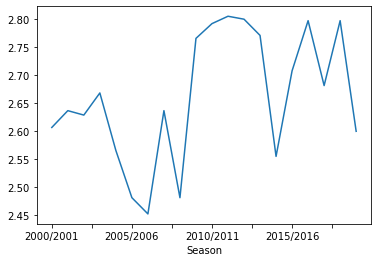

In [ ]:
df.groupby('Season')['Total_Goals'].mean().plot(kind='line')
plt.savefig("wykresy/avg_goals_per_season",pad_inches=0,bbox_inches='tight')

In [ ]:
conditions=[df['FTR']=='H',df['FTR']=='A',df['FTR']=='D']
choices=[3,0,1]
choices2=[0,3,1]
df['HomeTeamPoints']=np.select(conditions,choices,default=np.nan)
df['AwayTeamPoints']=np.select(conditions,choices2,default=np.nan)


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Losing Team,Winning Team,Season,Total_Goals,HomeTeamPoints,AwayTeamPoints
0,E0,19/08/00,Charlton,Man City,4,0,H,2,0,H,...,NaN,NaN,NaN,NaN,Man City,Charlton,2000/2001,4,3.0,0.0
1,E0,19/08/00,Chelsea,West Ham,4,2,H,1,0,H,...,NaN,NaN,NaN,NaN,West Ham,Chelsea,2000/2001,6,3.0,0.0
2,E0,19/08/00,Coventry,Middlesbrough,1,3,A,1,1,D,...,NaN,NaN,NaN,NaN,Coventry,Middlesbrough,2000/2001,4,0.0,3.0
3,E0,19/08/00,Derby,Southampton,2,2,D,1,2,A,...,NaN,NaN,NaN,NaN,Match Drawn,Match Drawn,2000/2001,4,1.0,1.0
4,E0,19/08/00,Leeds,Everton,2,0,H,2,0,H,...,NaN,NaN,NaN,NaN,Everton,Leeds,2000/2001,2,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7255,E0,15/02/2020,Norwich,Liverpool,0,1,A,0,0,D,...,1.96,2.14,1.85,2.01,Norwich,Liverpool,2019/2020,1,0.0,3.0
7256,E0,16/02/2020,Aston Villa,Tottenham,2,3,A,1,2,A,...,1.98,2.00,1.93,1.94,Aston Villa,Tottenham,2019/2020,5,0.0,3.0
7257,E0,16/02/2020,Arsenal,Newcastle,4,0,H,0,0,D,...,2.09,1.89,2.02,1.86,Newcastle,Arsenal,2019/2020,4,3.0,0.0
7258,E0,17/02/2020,Chelsea,Man United,0,2,A,0,1,A,...,2.05,2.01,1.97,1.89,Chelsea,Man United,2019/2020,2,0.0,3.0


In [ ]:
df[['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','Losing Team','Winning Team','Season','Total_Goals','HomeTeamPoints','AwayTeamPoints']]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Losing Team,Winning Team,Season,Total_Goals,HomeTeamPoints,AwayTeamPoints
0,19/08/00,Charlton,Man City,4,0,H,Man City,Charlton,2000/2001,4,3.0,0.0
1,19/08/00,Chelsea,West Ham,4,2,H,West Ham,Chelsea,2000/2001,6,3.0,0.0
2,19/08/00,Coventry,Middlesbrough,1,3,A,Coventry,Middlesbrough,2000/2001,4,0.0,3.0
3,19/08/00,Derby,Southampton,2,2,D,Match Drawn,Match Drawn,2000/2001,4,1.0,1.0
4,19/08/00,Leeds,Everton,2,0,H,Everton,Leeds,2000/2001,2,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7255,15/02/2020,Norwich,Liverpool,0,1,A,Norwich,Liverpool,2019/2020,1,0.0,3.0
7256,16/02/2020,Aston Villa,Tottenham,2,3,A,Aston Villa,Tottenham,2019/2020,5,0.0,3.0
7257,16/02/2020,Arsenal,Newcastle,4,0,H,Newcastle,Arsenal,2019/2020,4,3.0,0.0
7258,17/02/2020,Chelsea,Man United,0,2,A,Chelsea,Man United,2019/2020,2,0.0,3.0


**Average points per home match**

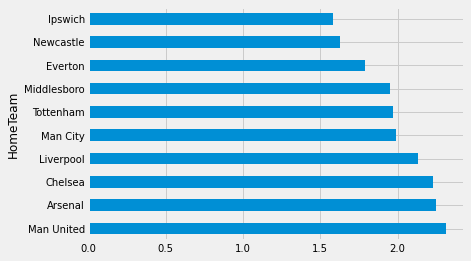

In [ ]:
df.groupby("HomeTeam")['HomeTeamPoints'].mean().sort_values(ascending=False).head(10).plot(kind='barh')
plt.savefig("wykresy/home_team_points_2000-2019",pad_inches=0,bbox_inches='tight')

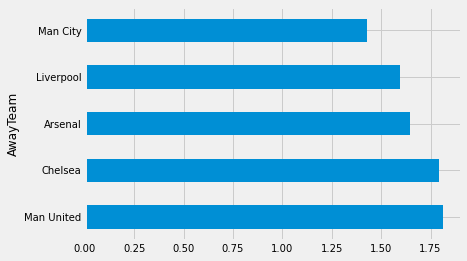

In [ ]:
#Average points per away match
df.groupby("AwayTeam")['AwayTeamPoints'].mean().sort_values(ascending=False).head(5).plot(kind='barh')
plt.savefig("wykresy/away_team_points_2000-2019",pad_inches=0,bbox_inches='tight')

In [ ]:
#head to head statistics
def win_loss(team1,team2):
    new_df=df[(df['HomeTeam']==team1) | (df['HomeTeam']==team2)]
    new_df=new_df[(new_df['AwayTeam']==team1) | (new_df['AwayTeam']==team2)]
    return new_df['Winning Team'].value_counts()

In [ ]:
win_loss('Chelsea','Arsenal')

Chelsea        16
Match Drawn    14
Arsenal         9
Name: Winning Team, dtype: int64

**Most home goals overall**

In [ ]:
# slicing the df so we can find the number of goals from a Home Team
# FTHG = Full Time Home Goals
hometeam = df.loc[:,['HomeTeam','FTHG']]
hometeam = hometeam.groupby('HomeTeam',as_index = False)['FTHG'].sum().sort_values(by = 'FTHG', ascending=True).tail(10)
hometeam

,HomeTeam,FTHG
1,Aston Villa,395
41,West Ham,427
28,Newcastle,475
16,Everton,585
38,Tottenham,651
24,Man City,693
23,Liverpool,711
25,Man United,769
12,Chelsea,770
0,Arsenal,794


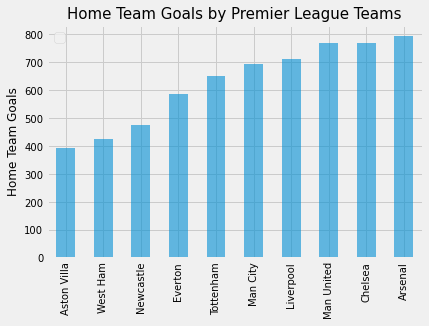

In [ ]:
#Overall goals in home matches
import matplotlib.pyplot as plt
hometeam.plot(kind= 'bar', x = 'HomeTeam', y='FTHG',alpha =0.6)
plt.style.use('fivethirtyeight')
plt.ylabel('Home Team Goals')
plt.xticks(rotation=90)
plt.legend('')
plt.xlabel('')
plt.title('Home Team Goals by Premier League Teams',fontsize=15)
plt.legend('')
plt.rcParams.update({'font.size':10})
plt.savefig("wykresy/most_home_team_goals_2000-2019",bbox_inches='tight')

**Least overall goals in home matches**

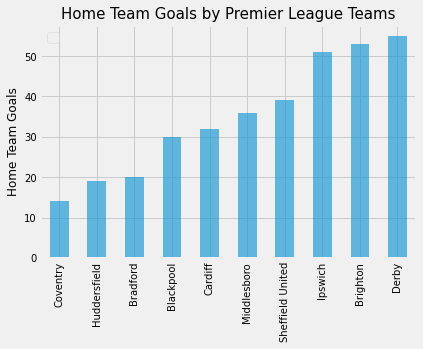

In [ ]:
hometeam = df.loc[:,['HomeTeam','FTHG']]
hometeam = hometeam.groupby('HomeTeam',as_index = False)['FTHG'].sum().sort_values(by = 'FTHG', ascending=True).head(10)

# Least overall goals in home matches
import matplotlib.pyplot as plt
hometeam.plot(kind= 'bar', x = 'HomeTeam', y='FTHG',alpha =0.6)
plt.style.use('fivethirtyeight')
plt.ylabel('Home Team Goals')
plt.xticks(rotation=90)
plt.legend('')
plt.xlabel('')
plt.title('Home Team Goals by Premier League Teams',fontsize=15)
plt.legend('')
plt.rcParams.update({'font.size':10})
plt.savefig("wykresy/least_home_team_goals_2000-2019",bbox_inches='tight')

**Most overall goals away**

In [ ]:
# Cutting only necessary data
awayteam = df.loc[:,['AwayTeam','FTAG']]
# Finding amount of away goals
awayteam = awayteam.groupby('AwayTeam',as_index = False)['FTAG'].mean().sort_values(by = 'FTAG', ascending=True).tail(10)

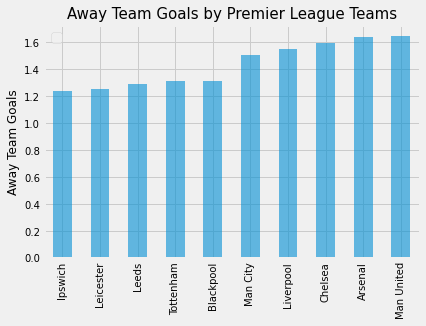

In [ ]:
# Goals scored away overall
import  matplotlib.pyplot as plt
awayteam.plot(kind= 'bar', x = 'AwayTeam', y='FTAG',alpha = 0.6)
plt.style.use('fivethirtyeight')
plt.ylabel('Away Team Goals')

plt.title('Away Team Goals by Premier League Teams',fontsize=15)
plt.legend('')
plt.xlabel('')
plt.rcParams.update({'font.size':10})
plt.savefig("wykresy/most_away_team_goals_2000-2019",pad_inches=0,bbox_inches='tight')
plt.show()

**Least goals scored away**

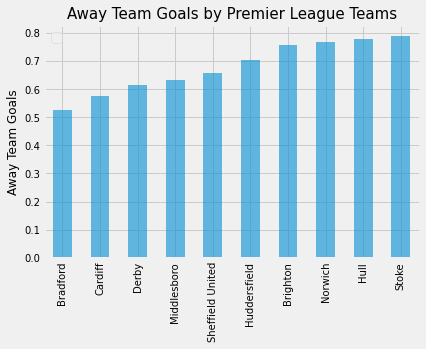

In [ ]:
# Least goals scored away

# Slicing the data
awayteam = df.loc[:,['AwayTeam','FTAG']]
# Finding the number of away team goals
awayteam = awayteam.groupby('AwayTeam',as_index = False)['FTAG'].mean().sort_values(by = 'FTAG', ascending=True).head(10)

awayteam.plot(kind= 'bar', x = 'AwayTeam', y='FTAG',alpha = 0.6)
plt.style.use('fivethirtyeight')
plt.ylabel('Away Team Goals')
plt.xticks(rotation=90)
plt.title('Away Team Goals by Premier League Teams',fontsize=15)
plt.legend('')
plt.xlabel('')
plt.rcParams.update({'font.size':10})
plt.savefig("wykresy/least_away_team_goals_2000-2019",pad_inches=0,bbox_inches='tight')
plt.show()

**Overall sum of scored goals**

In [ ]:
# Cleaning the data to find the number of goals scored
# FTHG = Full Time Home Goals
# FTAG = Full Time Away Goals
# Finding out number of goals scored by home and away and sorting numberofgoalscoredaway= awayteam.sort_values(by = 'AwayTeam', ascending=True)
numberofgoalscoredhome = hometeam.sort_values(by = 'HomeTeam', ascending=True)
numberofgoalscoredaway = awayteam.sort_values(by = 'AwayTeam', ascending=True)
# Merging the two dataframes together  
numberofgoalscored = numberofgoalscoredhome.join(numberofgoalscoredaway)
# Finding out the total number of goals
numberofgoalscored['Total Goals Scored'] = numberofgoalscored.FTHG + numberofgoalscored.FTAG
# Cleaning the data
numberofgoalscored = numberofgoalscored.drop(columns= ['HomeTeam'])
numberofgoalscored['Team']  = numberofgoalscored['AwayTeam']
numberofgoalscored = numberofgoalscored.drop(columns = 'AwayTeam')
# Reordering columns
numberofgoalscored = numberofgoalscored[['Team','FTAG','FTHG','Total Goals Scored']]

In [ ]:
# Starting another dataframe to find the number of goals conceded 
concededmostgoalsconceded = df.loc[:,['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG']]
# Finding the number of goals conceded by summing the total # of goals conceded at home and away
hometeamconceded = mostgoalsconceded.groupby('HomeTeam',as_index = False)['FTAG'].sum().sort_values(by = 'FTAG', ascending=True)
awayteamconceded = mostgoalsconceded.groupby('AwayTeam',as_index = False)['FTHG'].sum().sort_values(by = 'FTHG', ascending=True)
# Merging the two dataframes together
totalgoalsconceded = awayteamconceded.join(hometeamconceded)
#finding out the total number of goals conceded
totalgoalsconceded['Total Goals Conceded'] = totalgoalsconceded.FTHG + totalgoalsconceded.FTAG
# Cleaning the data
totalgoalsconceded['Team'] = totalgoalsconceded['AwayTeam']
totalgoalsconceded = totalgoalsconceded.drop(columns= ['HomeTeam','AwayTeam'])
totalgoalsconceded = totalgoalsconceded[['Team','FTHG','FTAG','Total Goals Conceded']]

**Most wins 2000-2019**

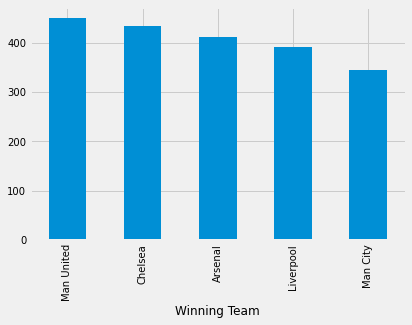

In [ ]:
df[df['Winning Team'] != 'Match Drawn'].groupby('Winning Team')['Winning Team'].count()
.sort_values(ascending=False).head(5).plot(kind='bar')
plt.savefig("wykresy/most_wins_per_team_2000-2019",pad_inches=0,bbox_inches='tight')


**Least wins 2000-2019**

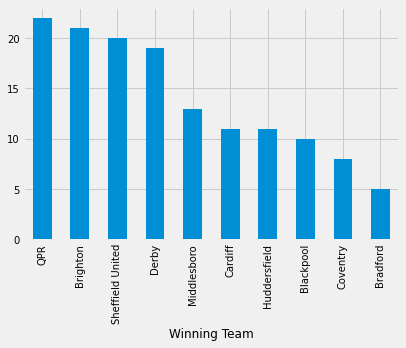

In [ ]:
df.groupby('Winning Team')['Winning Team'].count().sort_values(ascending=False).tail(10).plot(kind='bar')
plt.savefig("wykresy/least_wins_per_team_2000-2019",pad_inches=0,bbox_inches='tight')


**Most draws in home matches**

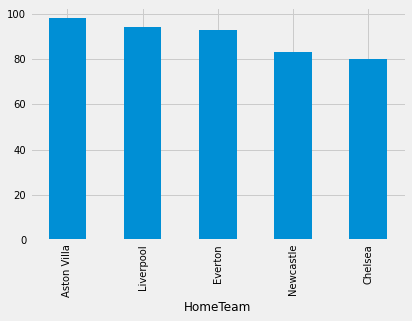

In [ ]:
df[df['Winning Team'] == 'Match Drawn'].groupby('HomeTeam')['HomeTeam'].count().sort_values(ascending=False).head(5).plot(kind='bar')
plt.savefig("wykresy/MOST_HOME_DRAWS_per_team_2000-2019",pad_inches=0,bbox_inches='tight')


**Least draws in home matches**

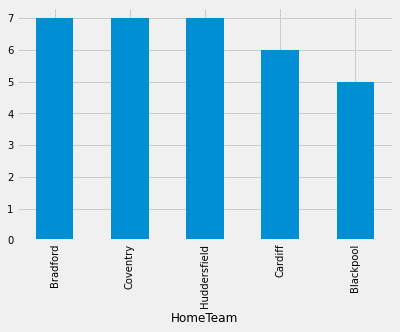

In [ ]:
df[df['Winning Team'] == 'Match Drawn'].groupby('HomeTeam')['HomeTeam'].count().sort_values(ascending=False).tail(5).plot(kind='bar')
plt.savefig("wykresy/least_HOME_DRAWS_per_team_2000-2019",pad_inches=0,bbox_inches='tight')


**Most draws in home matches**

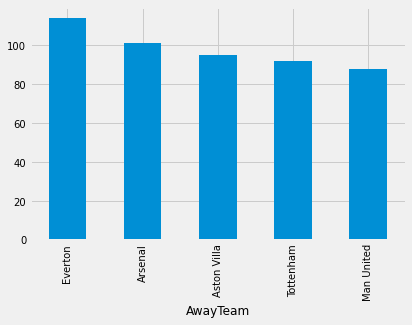

In [ ]:
df[df['Winning Team'] == 'Match Drawn'].groupby('AwayTeam')['AwayTeam'].count().sort_values(ascending=False).head(5).plot(kind='bar')
plt.savefig("wykresy/MOST_AWAY_DRAWS_per_team_2000-2019",pad_inches=0,bbox_inches='tight')


**Least draws in away matches**

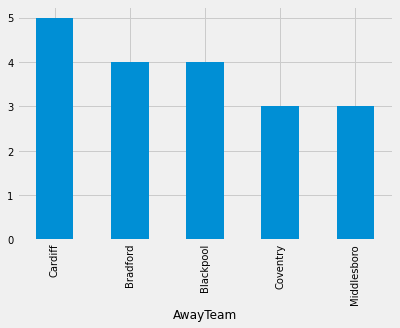

In [ ]:
df[df['Winning Team'] == 'Match Drawn'].groupby('AwayTeam')['AwayTeam'].count().sort_values(ascending=False).tail(5).plot(kind='bar')
plt.savefig("wykresy/least_AWAY_DRAWS_per_team_2000-2019",pad_inches=0,bbox_inches='tight')


**Most losses**

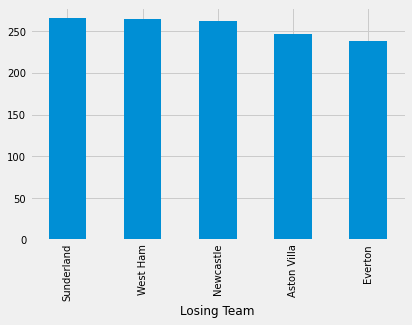

In [ ]:
df[df['Losing Team'] != 'Match Drawn'].groupby('Losing Team')['Losing Team'].count().sort_values(ascending=False).head(5).plot(kind='bar')
plt.savefig("wykresy/most_losses_per_team_2000-2019",pad_inches=0,bbox_inches='tight')


**Least losses**

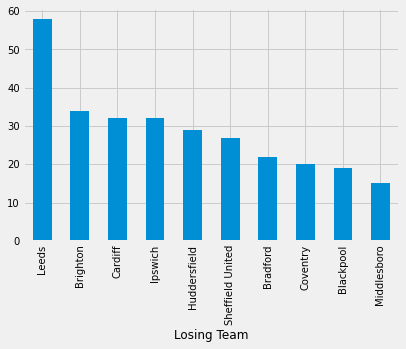

In [ ]:
df.groupby('Losing Team')['Losing Team'].count().sort_values(ascending=False).tail(10).plot(kind='bar')
plt.savefig("wykresy/least_losses_per_team_2000-2019",pad_inches=0,bbox_inches='tight')


**Most draws overall**

Index(['HomeTeam', 'home_draws', 'AwayTeam', 'away_draws', 'sum_draws'], dtype='object')


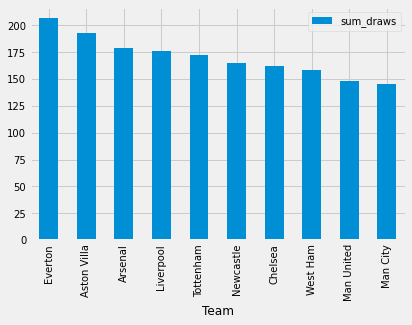

In [ ]:
home_draws = df[df['Winning Team'] == 'Match Drawn'].groupby('HomeTeam')['HomeTeam'].count().reset_index(name='home_draws')
away_draws = df[df['Winning Team'] == 'Match Drawn'].groupby('AwayTeam')['AwayTeam'].count().reset_index(name='away_draws')

total_draws = pd.merge(left=home_draws,right=away_draws,left_on='HomeTeam',right_on='AwayTeam')
total_draws['sum_draws']=total_draws['home_draws']+total_draws['away_draws']
print(total_draws.columns)
total_draws = total_draws.rename({'HomeTeam': 'Team'},axis='columns')
total_draws.sort_values(by = 'sum_draws', ascending=False).head(10).plot(kind='bar',x='Team',y='sum_draws')
plt.savefig("wykresy/most_DRAWS_per_team_2000-2019",pad_inches=0,bbox_inches='tight')


**Least draws overall**

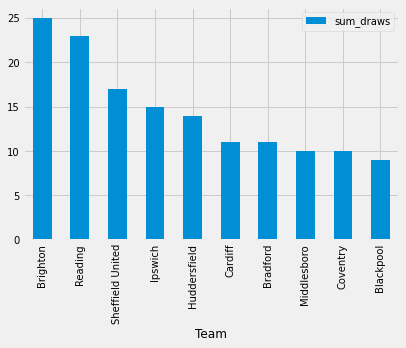

In [ ]:
total_draws.sort_values(by = 'sum_draws', ascending=False).tail(10).plot(kind='bar',x='Team',y='sum_draws')
plt.savefig("wykresy/least_DRAWS_per_team_2000-2019",pad_inches=0,bbox_inches='tight')


**Most average goals in first half**

In [ ]:
#Przygotowanie danych
first_half_home_goals=df[['HomeTeam','HTHG']]
first_half_home_goals.columns=['Team','Goals']
first_half_away_goals=df[['AwayTeam','HTAG']]
first_half_away_goals.columns=['Team','Goals']
first_half_data=pd.concat([first_half_home_goals,first_half_away_goals],ignore_index=True)
first_half_data

,Team,Goals
0,Charlton,2
1,Chelsea,1
2,Coventry,1
3,Derby,1
4,Leeds,2
...,...,...
14515,Liverpool,0
14516,Tottenham,2
14517,Newcastle,0
14518,Man United,1


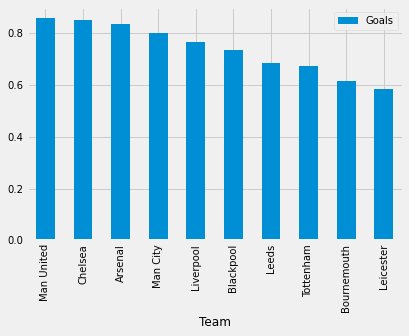

In [ ]:
first_half_data.groupby('Team').mean().sort_values(ascending=False,by='Goals').head(10).plot(kind='bar')
plt.savefig("wykresy/most_GOALS_1HALF_per_team_2000-2019",pad_inches=0,bbox_inches='tight')


**Least average goals in first half**

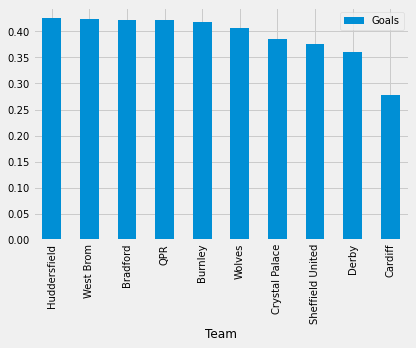

In [ ]:
first_half_data.groupby('Team').mean().sort_values(ascending=False,by='Goals').tail(10).plot(kind='bar')
plt.savefig("wykresy/least_GOALS_1HALF_per_team_2000-2019",pad_inches=0,bbox_inches='tight')


**Most average goals in second half**

In [ ]:
#SHHG = Second Half Home Goals
df['SHHG'] = df['FTHG'] - df['HTHG']

#SHAG = Second Half Away Goals
df['SHAG'] = df['FTAG'] - df['HTAG']


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AvgCAHH,AvgCAHA,Losing Team,Winning Team,Season,Total_Goals,HomeTeamPoints,AwayTeamPoints,SHHG,SHAG
0,E0,19/08/00,Charlton,Man City,4,0,H,2,0,H,...,NaN,NaN,Man City,Charlton,2000/2001,4,3.0,0.0,2,0
1,E0,19/08/00,Chelsea,West Ham,4,2,H,1,0,H,...,NaN,NaN,West Ham,Chelsea,2000/2001,6,3.0,0.0,3,2
2,E0,19/08/00,Coventry,Middlesbrough,1,3,A,1,1,D,...,NaN,NaN,Coventry,Middlesbrough,2000/2001,4,0.0,3.0,0,2
3,E0,19/08/00,Derby,Southampton,2,2,D,1,2,A,...,NaN,NaN,Match Drawn,Match Drawn,2000/2001,4,1.0,1.0,1,0
4,E0,19/08/00,Leeds,Everton,2,0,H,2,0,H,...,NaN,NaN,Everton,Leeds,2000/2001,2,3.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7255,E0,15/02/2020,Norwich,Liverpool,0,1,A,0,0,D,...,1.85,2.01,Norwich,Liverpool,2019/2020,1,0.0,3.0,0,1
7256,E0,16/02/2020,Aston Villa,Tottenham,2,3,A,1,2,A,...,1.93,1.94,Aston Villa,Tottenham,2019/2020,5,0.0,3.0,1,1
7257,E0,16/02/2020,Arsenal,Newcastle,4,0,H,0,0,D,...,2.02,1.86,Newcastle,Arsenal,2019/2020,4,3.0,0.0,4,0
7258,E0,17/02/2020,Chelsea,Man United,0,2,A,0,1,A,...,1.97,1.89,Chelsea,Man United,2019/2020,2,0.0,3.0,0,1


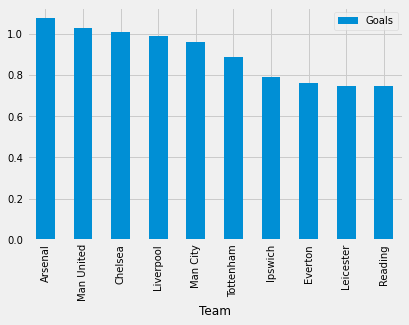

In [ ]:
second_half_home_goals=df[['HomeTeam','SHHG']]
second_half_home_goals.columns=['Team','Goals']
second_half_away_goals=df[['AwayTeam','SHAG']]
second_half_away_goals.columns=['Team','Goals']
second_half_data=pd.concat([second_half_home_goals,second_half_away_goals],ignore_index=True)
second_half_data.groupby('Team').mean().sort_values(ascending=False,by='Goals').head(10).plot(kind='bar')
plt.savefig("wykresy/most_GOALS_2HALF_per_team_2000-2019",pad_inches=0,bbox_inches='tight')


**Least goals in second half**

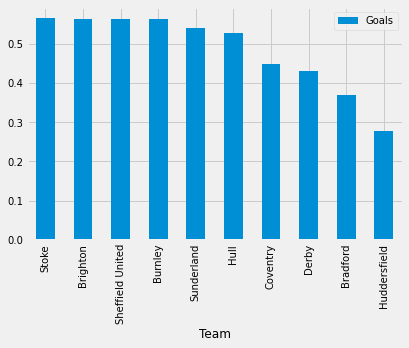

In [ ]:
second_half_data.groupby('Team').mean().sort_values(ascending=False,by='Goals').tail(10).plot(kind='bar')
plt.savefig("wykresy/least_GOALS_2HALF_per_team_2000-2019",pad_inches=0,bbox_inches='tight')


**Average number of fouls**

<AxesSubplot:xlabel='Team'>

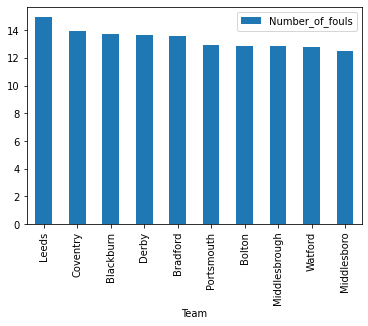

In [ ]:
home_fouls=df[['HomeTeam','HF']]
home_fouls.columns=['Team','Number_of_fouls']
away_fouls=df[['AwayTeam','AF']]
away_fouls.columns=['Team','Number_of_fouls']

fouls = pd.concat([home_fouls,away_fouls],ignore_index=True)
fouls.groupby('Team').mean().sort_values(ascending=False,by='Number_of_fouls').head(10).plot(kind='bar')


plt.savefig("wykresy/most_FOULS_per_team_2000-2019",pad_inches=0,bbox_inches='tight')


**Yellow cards**

<AxesSubplot:xlabel='Team'>

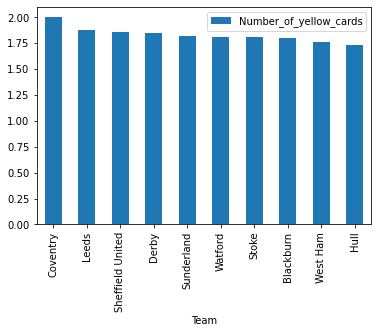

In [ ]:
#Datasets for yellow cards

home_yellow_cards=df[['HomeTeam','HY']]
home_yellow_cards.columns=['Team','Number_of_yellow_cards']
away_yellow_cards=df[['AwayTeam','AY']]
away_yellow_cards.columns=['Team','Number_of_yellow_cards']

yellow_cards = pd.concat([home_yellow_cards,away_yellow_cards],ignore_index=True)
yellow_cards.groupby('Team').mean().sort_values(ascending=False,by='Number_of_yellow_cards').head(10).plot(kind='bar')


plt.savefig("wykresy/most_YELLOW_CARDS_per_team_2000-2019",pad_inches=0,bbox_inches='tight')


**Red cards**

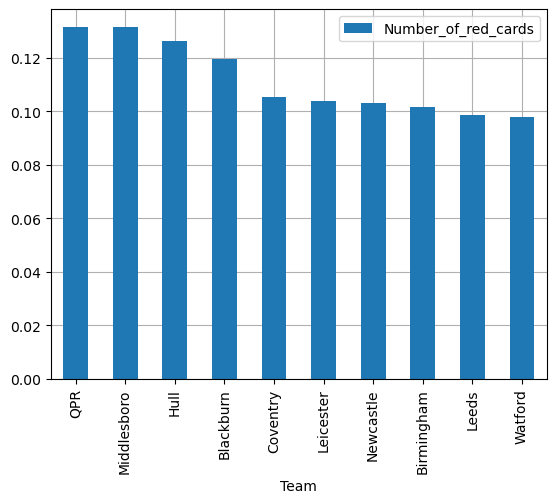

In [ ]:
#Red cards
home_red_cards=df[['HomeTeam','HR']]
home_red_cards.columns=['Team','Number_of_red_cards']
away_red_cards=df[['AwayTeam','AR']]
away_red_cards.columns=['Team','Number_of_red_cards']
plt.rc('axes', axisbelow=True)
red_cards = pd.concat([home_red_cards,away_red_cards],ignore_index=True)
red_cards.groupby('Team').mean().sort_values(ascending=False,by='Number_of_red_cards').head(10).plot(kind='bar')
plt.grid(b=True)
plt.rcParams['axes.facecolor'] = 'white'
plt.savefig("wykresy/most_RED_CARDS_per_team_2000-2019",pad_inches=0,bbox_inches='tight')

**Yellow cards and fouls on scatter plot**

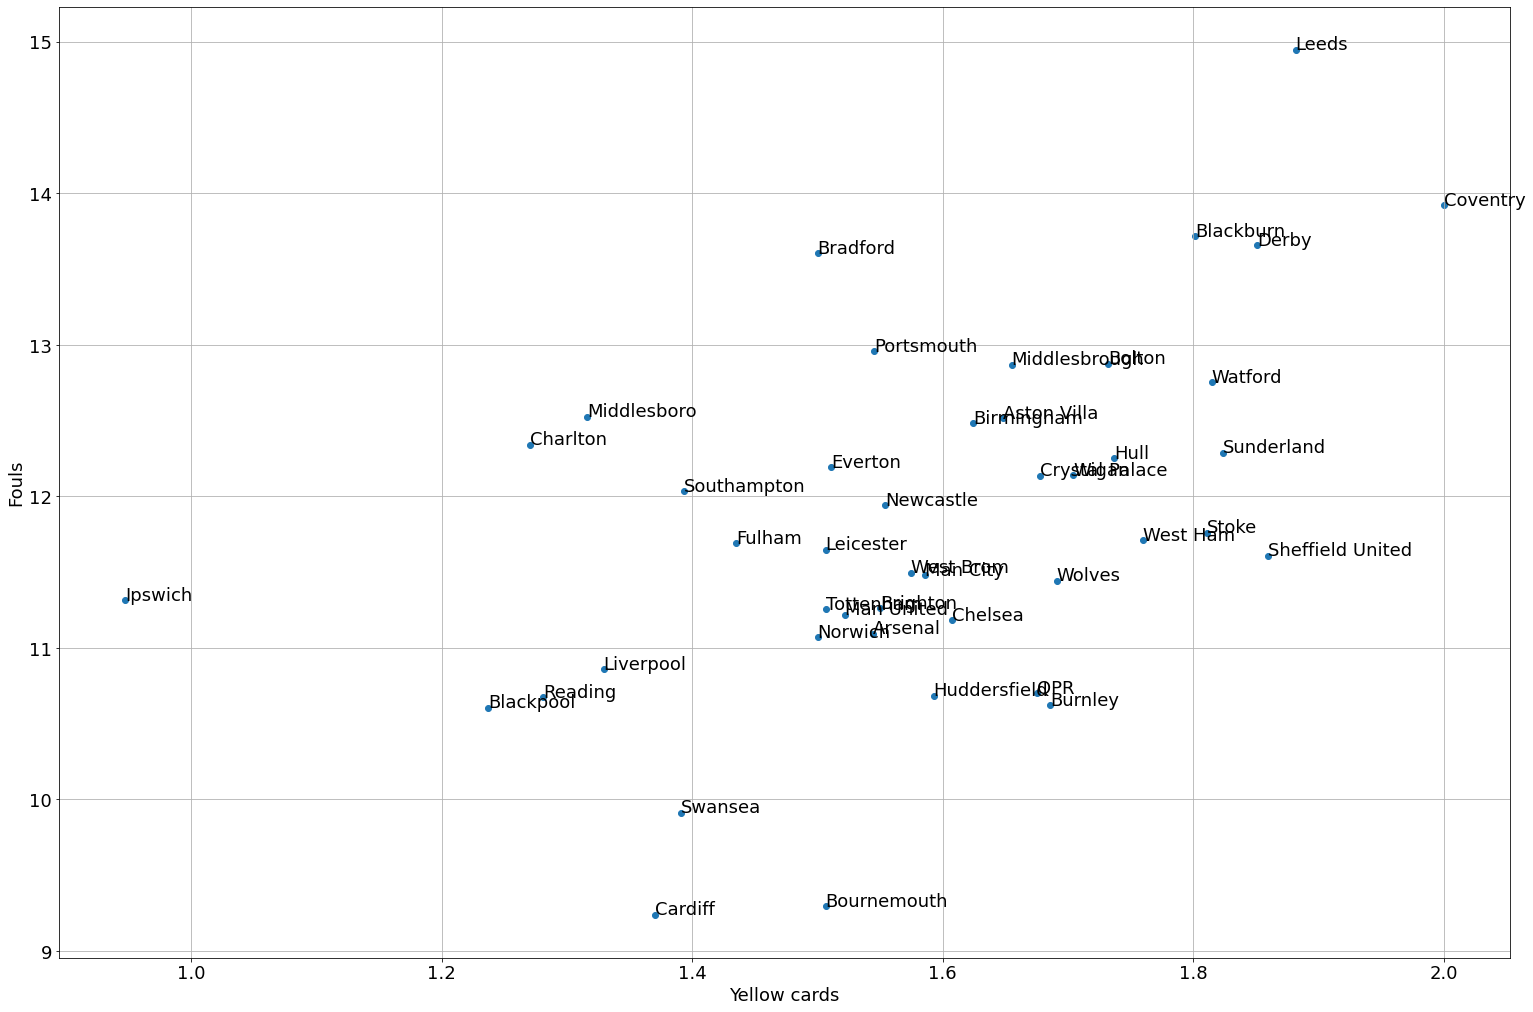

In [ ]:
from matplotlib.pyplot import figure
import  matplotlib.pyplot as plt

home_yellow_cards=df[['HomeTeam','HY']]
home_yellow_cards.columns=['Team','Number_of_yellow_cards']
away_yellow_cards=df[['AwayTeam','AY']]
away_yellow_cards.columns=['Team','Number_of_yellow_cards']

yellow_cards = pd.concat([home_yellow_cards,away_yellow_cards],ignore_index=True)
yellow_cards.groupby('Team').mean().sort_values(ascending=False,by='Number_of_yellow_cards').head(10).plot(kind='bar')

yellow_mean = yellow_cards.groupby('Team').mean()
fouls_mean = fouls.groupby('Team').mean()
yellow_and_fouls=pd.merge(left=yellow_mean,right=fouls_mean,left_on='Team',right_on='Team').reset_index()
yellow_and_fouls
# yellow_and_fouls.plot(kind='scatter',x='Number_of_yellow_cards',y='Number_of_fouls',c='Team')

# plt.scatter(x=yellow_and_fouls.Number_of_yellow_cards,y=yellow_and_fouls.Number_of_fouls,c=yellow_and_fouls.Team)


# matplotlib.rc('font', **font)
# plt.rc('axes', axisbelow=True)
plt.rcParams.update({'font.size':18})
x=yellow_and_fouls.Number_of_yellow_cards
y=yellow_and_fouls.Number_of_fouls
n=yellow_and_fouls.Team

fig, ax = plt.subplots()
fig.set_size_inches(26, 17.5)
ax.scatter(x, y)
ax.set_xlabel('Yellow cards')
ax.set_ylabel('Fouls')
ax.grid()
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
plt.rcParams.update({'font.size':12})
plt.savefig("wykresy/SCATTER_cards_and_fouls",pad_inches=0,bbox_inches='tight')

**Percentage of draws**

isDraw
Draw      1851
Winner    5409
Name: Winning Team, dtype: int64
Odsetek meczy zremisowanych: 25.50


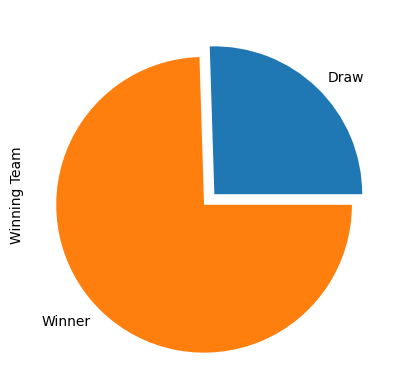

In [ ]:
df['isDraw']= np.where(df['Winning Team']=='Match Drawn', 'Draw', 'Winner')
df.groupby('isDraw')['Winning Team'].count().plot(kind='pie',explode=[0,.1])
plt.savefig("wykresy/percentage_of_draws",pad_inches=0,bbox_inches='tight')